
K-Means Customer Segmentation Analysis


In [33]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#1.อ่านไฟล์
data = pd.read_csv("D:/660710616/10-Lab-KMean-Exercise/Mall_Customers.csv")

In [6]:
#2.แสดงผล 10 บรรทัดแรก
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
#3.ตรวจสอบ missing values,หาค่าสถิติพื้นฐาน
data[data.isnull()].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Genre'>

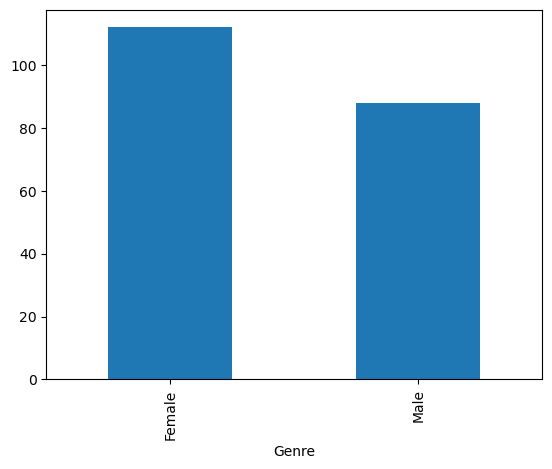

In [25]:
# 4.ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ
data.groupby(['Genre'])['Genre'].count().plot(kind='bar')

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

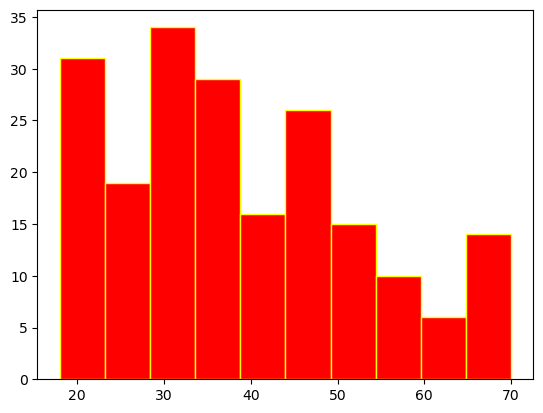

In [59]:
#5.สร้าง histogram ของอายุ แบ่งเป็น 10 bin
plt.hist(data['Age'],bins=10, color = 'red', edgecolor = 'yellow')

<Axes: ylabel='Age'>

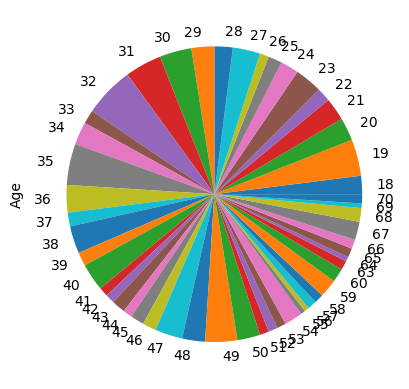

In [28]:
data.groupby(['Age'])['Age'].count().plot(kind='pie')

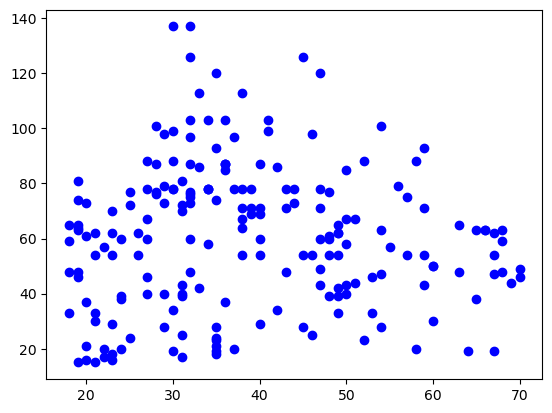

In [32]:
#6.ทำ scatter plot ของข้อมูล Age, Income ทั้งแบบแยกและไม่แยกตามเพศ
plt.scatter(data['Age'], data['Annual Income (k$)'], color = "blue") #ไม่แยกเพศ

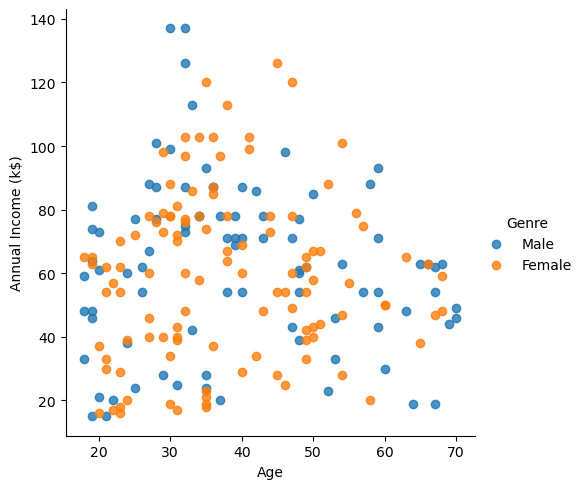

In [34]:
sns.lmplot(x='Age',y='Annual Income (k$)',data=data,fit_reg=False,hue='Genre')

In [60]:
#data.groupby(['Age'])['Annual Income (k$)'].count().plot(kind='pie')

In [61]:
#rank = data.groupby([''])['Annual Income (k$)'].count()

# Create the pie chart

#plt.pie(rank, labels=rank)
#plt.show()

In [69]:
#  7. นำ ข้อมูล Age, Income มาทำ clustering พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering


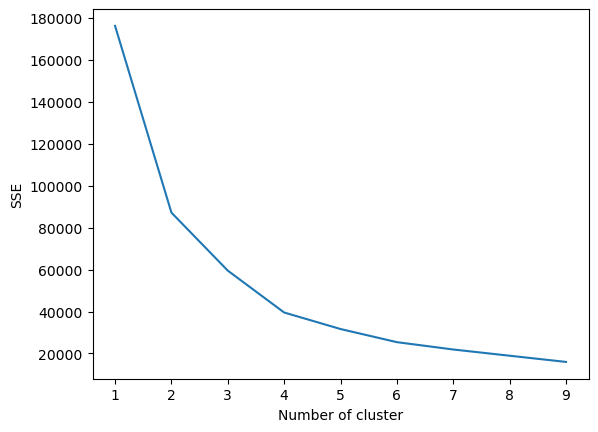

In [118]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
#number = preprocessing.LabelEncoder()
#data['Genre'] = number.fit_transform(data['Genre'])
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data[['Age','Annual Income (k$)']])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [107]:
x = [['Age','Annual Income (k$)']]

1 176108.78
2 87121.56591478697
3 59486.961439280356
4 39502.77850064538
5 31659.353138717815
6 25399.02200441698
7 21839.635516285518
8 18881.13519034741
9 15996.683329580637


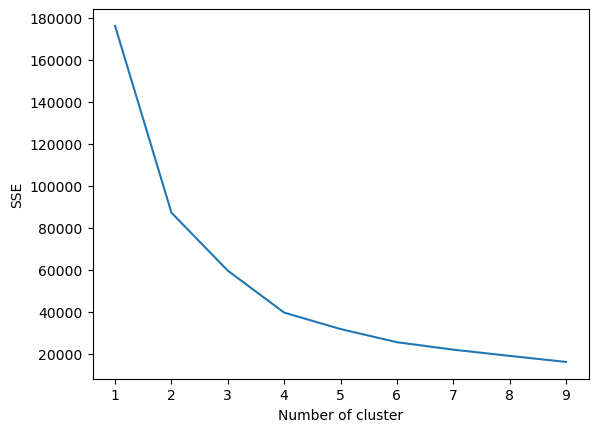

In [119]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data[['Age','Annual Income (k$)']])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8.ได้ค่า k= ? ในการจัดกลุ่มโดยวิธี K-Means

4. 195401.19855991466

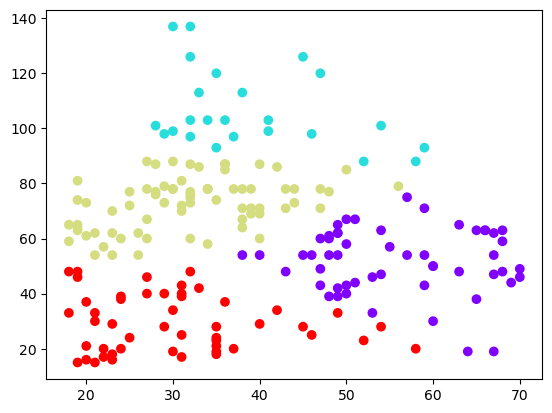

In [132]:
k_means = KMeans(n_clusters=4)
k_means.fit(data[['Age','Annual Income (k$)']])
cluster_scale_pred = k_means.fit_predict(data[['Age','Annual Income (k$)']])
centers = k_means.cluster_centers_

plt.scatter(data['Age'], data['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")

9.ทำ scatter plot ที่แสดง centroid

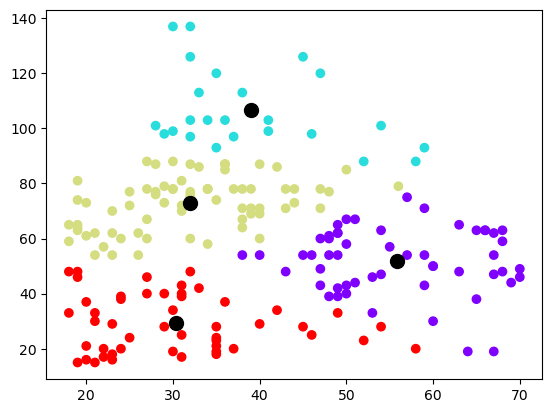

In [133]:
plt.scatter(data['Age'], data['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)